# Imports

In [51]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt

# Data loading
We are analysing only the training dataset - no information leak.

In [53]:
data = pd.read_csv('../dataset/train.csv')
data.shape

(1120, 23)

# Exploration

In [50]:
# check for missing values
data.isna().sum()

id                      0
alcohol                 0
chlorides               0
citric acid             0
density                 0
feat04                  0
feat07                  0
fixed acidity           0
free sulfur dioxide     0
pH                      0
quality                 0
residual sugar          0
sulphates               0
total sulfur dioxide    0
volatile acidity        0
dtype: int64

In [39]:
data.dtypes # correct types
data.head() # 10 features have been added -- all numerical 

,id,alcohol,chlorides,citric acid,density,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,707,9.9,0.094,0.08,0.98680,0.273854,0.001563,0.290067,0.482811,0.255778,0.030030,0.157586,0.156641,0.923511,0.314623,7.8,17.0,3.24,5.798757,2.6,4.59,50.0,0.44
1,91,10.6,0.091,0.37,1.00786,0.978193,0.478395,0.253518,0.442597,0.427081,0.713848,0.382834,0.730011,0.866582,0.869215,9.8,12.0,3.27,5.591484,2.2,4.56,24.0,0.41
2,362,10.4,0.125,0.00,0.98629,0.620061,0.255492,0.899715,0.756197,0.112102,0.748591,0.658483,0.898537,0.185878,0.317946,6.8,23.0,3.48,5.867731,2.9,4.63,30.0,0.68
3,1254,9.4,0.083,0.30,0.98685,0.371038,0.433525,0.396631,0.781422,0.493168,0.909016,0.713833,0.933911,0.527736,0.653639,7.4,33.0,3.45,7.435031,1.7,4.59,72.0,0.38
4,23,9.3,0.070,0.26,1.00810,0.768617,0.421615,0.533561,0.560572,0.648314,0.872612,0.545775,0.209876,0.964140,0.294207,7.5,37.0,3.40,5.716626,7.1,4.49,123.0,0.60


In [40]:
data.describe()

,id,alcohol,chlorides,citric acid,density,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,708.727679,10.451994,0.087452,0.267571,0.996420,0.510163,0.506919,0.495302,0.567404,0.501801,0.494231,0.532572,0.497221,0.485028,0.516109,8.491964,17.645536,3.338286,5.664836,2.451741,4.665357,46.216071,0.528513
std,404.203941,1.079993,0.051215,0.191933,0.008392,0.290063,0.288473,0.293406,0.143412,0.296646,0.295098,0.154403,0.293874,0.285510,0.289740,1.683163,9.963216,0.156516,1.219234,1.455742,0.184639,32.767306,0.179020
min,1.000000,8.400000,0.002000,0.000000,0.980640,0.000218,0.000363,0.000349,0.061816,0.000021,0.000036,0.000000,0.000135,0.001477,0.000084,4.800000,3.000000,2.770000,1.780942,0.800000,4.330000,4.000000,0.100000
25%,359.750000,9.600000,0.068000,0.090000,0.987830,0.258741,0.262558,0.250804,0.474356,0.240963,0.236256,0.432226,0.230959,0.247041,0.272434,7.300000,9.000000,3.240000,4.860728,1.800000,4.550000,22.000000,0.390000
50%,710.500000,10.200000,0.079000,0.260000,0.996450,0.528357,0.502071,0.480689,0.566564,0.501540,0.497426,0.535721,0.512772,0.474104,0.525361,8.100000,15.000000,3.335000,5.674194,2.100000,4.620000,37.000000,0.510000
75%,1063.250000,11.100000,0.092000,0.420000,1.005492,0.760408,0.766193,0.755401,0.665609,0.763024,0.751147,0.634642,0.751178,0.718329,0.763051,9.400000,23.000000,3.430000,6.455282,2.500000,4.740000,62.000000,0.640000
max,1400.000000,15.000000,0.611000,1.000000,1.013150,0.999265,0.998542,0.999650,1.000000,0.998952,0.997389,1.000000,0.997739,0.998446,0.999402,16.100000,74.000000,4.040000,10.545302,15.400000,6.000000,287.000000,1.330000


## First impression

Based on the distributions of the additional features 1-10 we can presume that some of them are just random noise.

We can see that features 1, 2, 3, 5, 6, 8, 9, 10 have means close to 0.5 and stds close to 0.28 which are mean and std of uniform distribution over [0,1] . The min and max are 0 and 1.

Moreover, the quantiles almost overlap as well.

Therefore additional features 1, 2, 3, 5, 6, 8, 9, 10 are most likely random noise. We are going to test it with correlations.

Additional features 4 and 7 are similar to each other but are not instantly recognizable as random noise (although they could very much be one).

## Correlation analysis

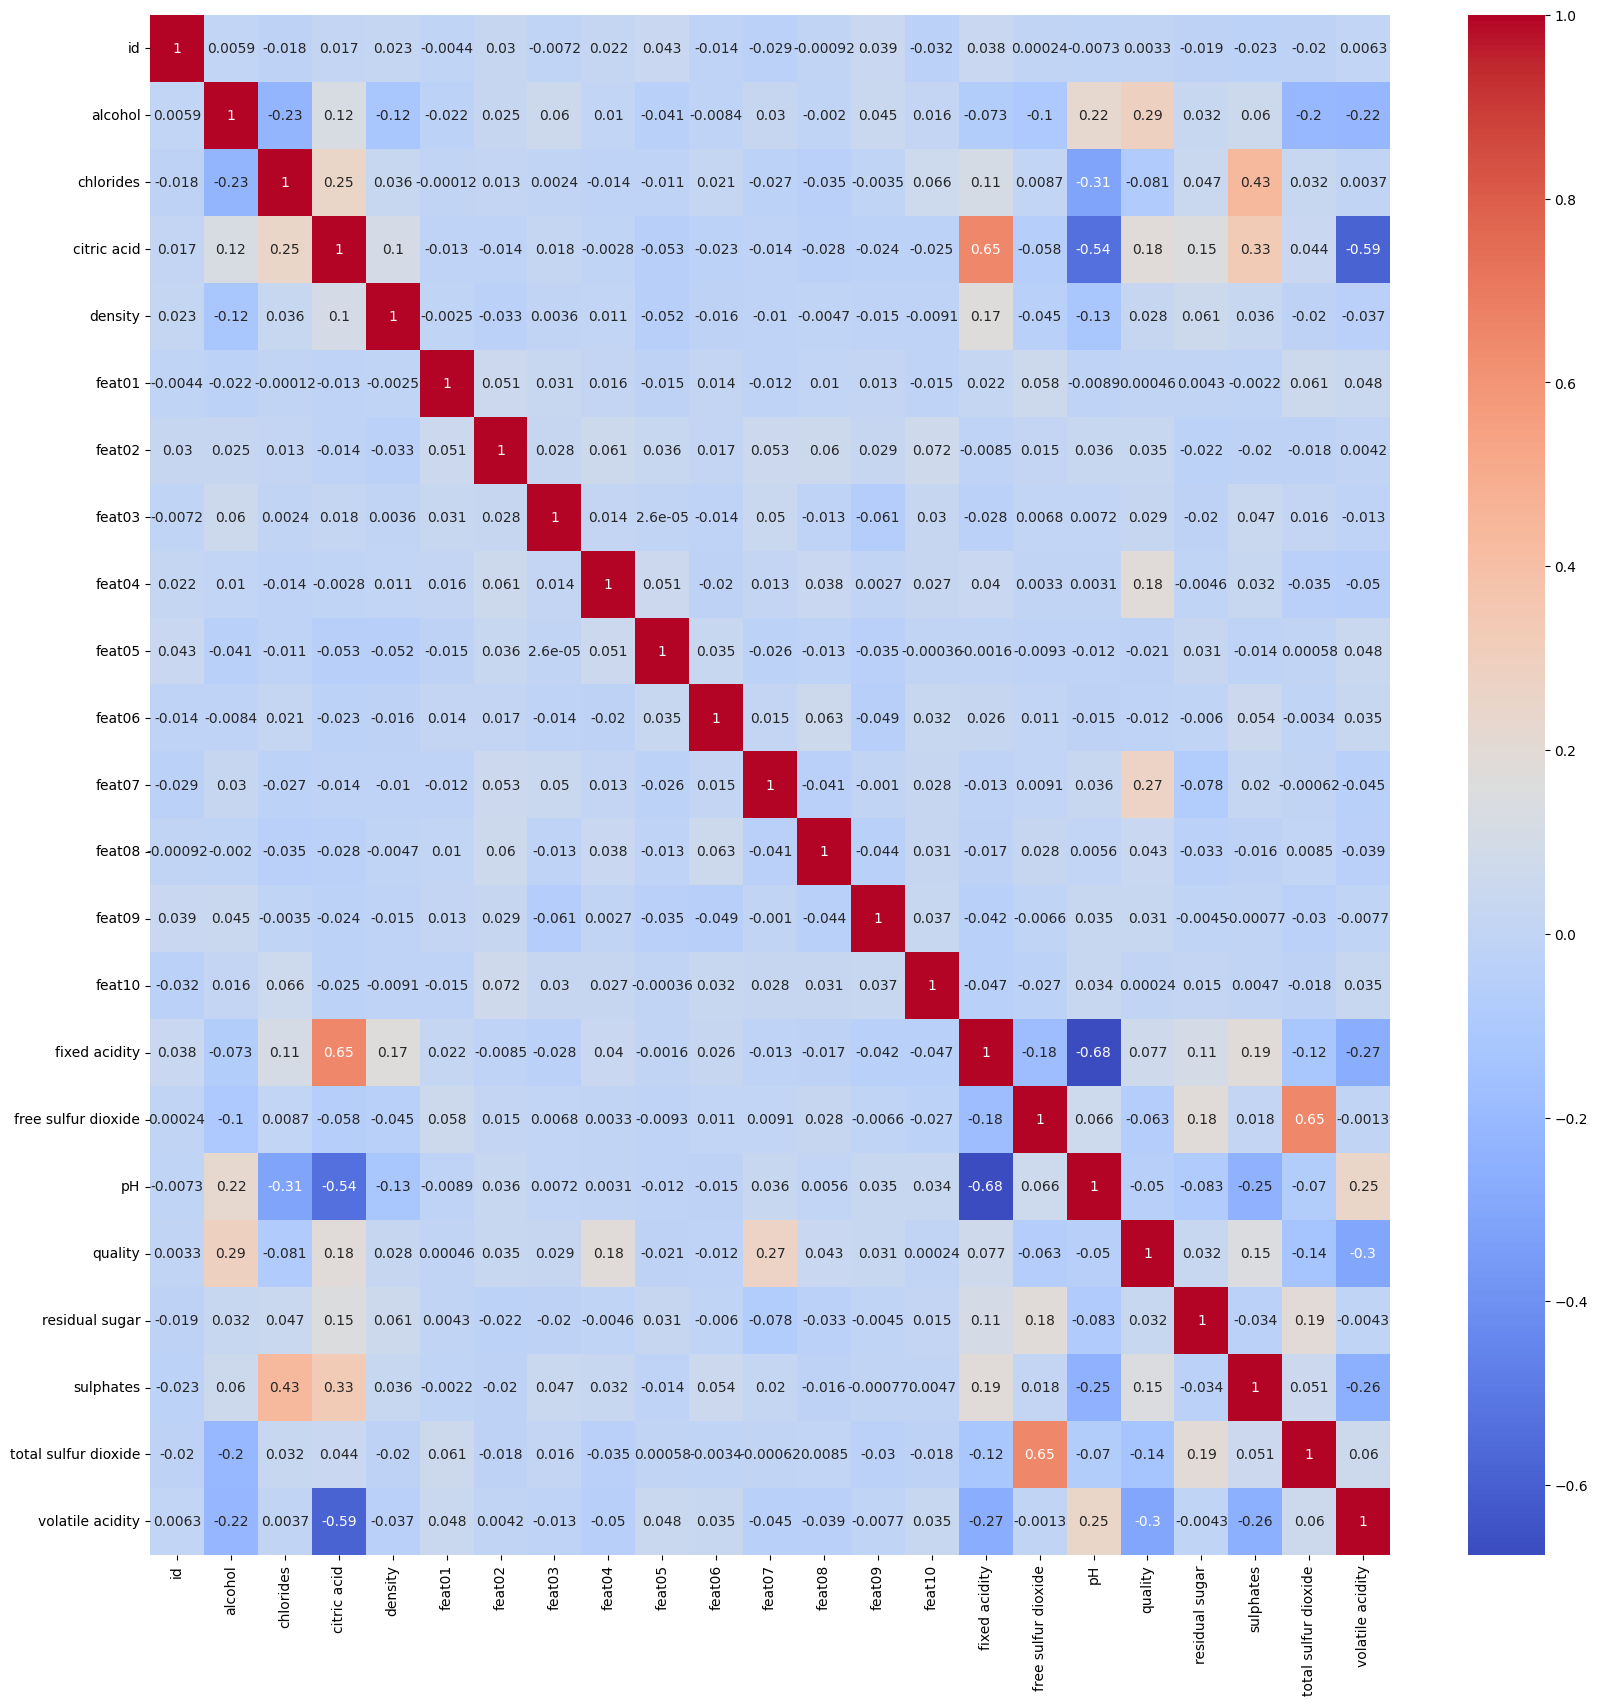

In [41]:
# Assuming df is your DataFrame
correlation_matrix = data.corr()

# Use seaborn to create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig("../plots/correlation_matrix.svg", format='svg')
plt.show()

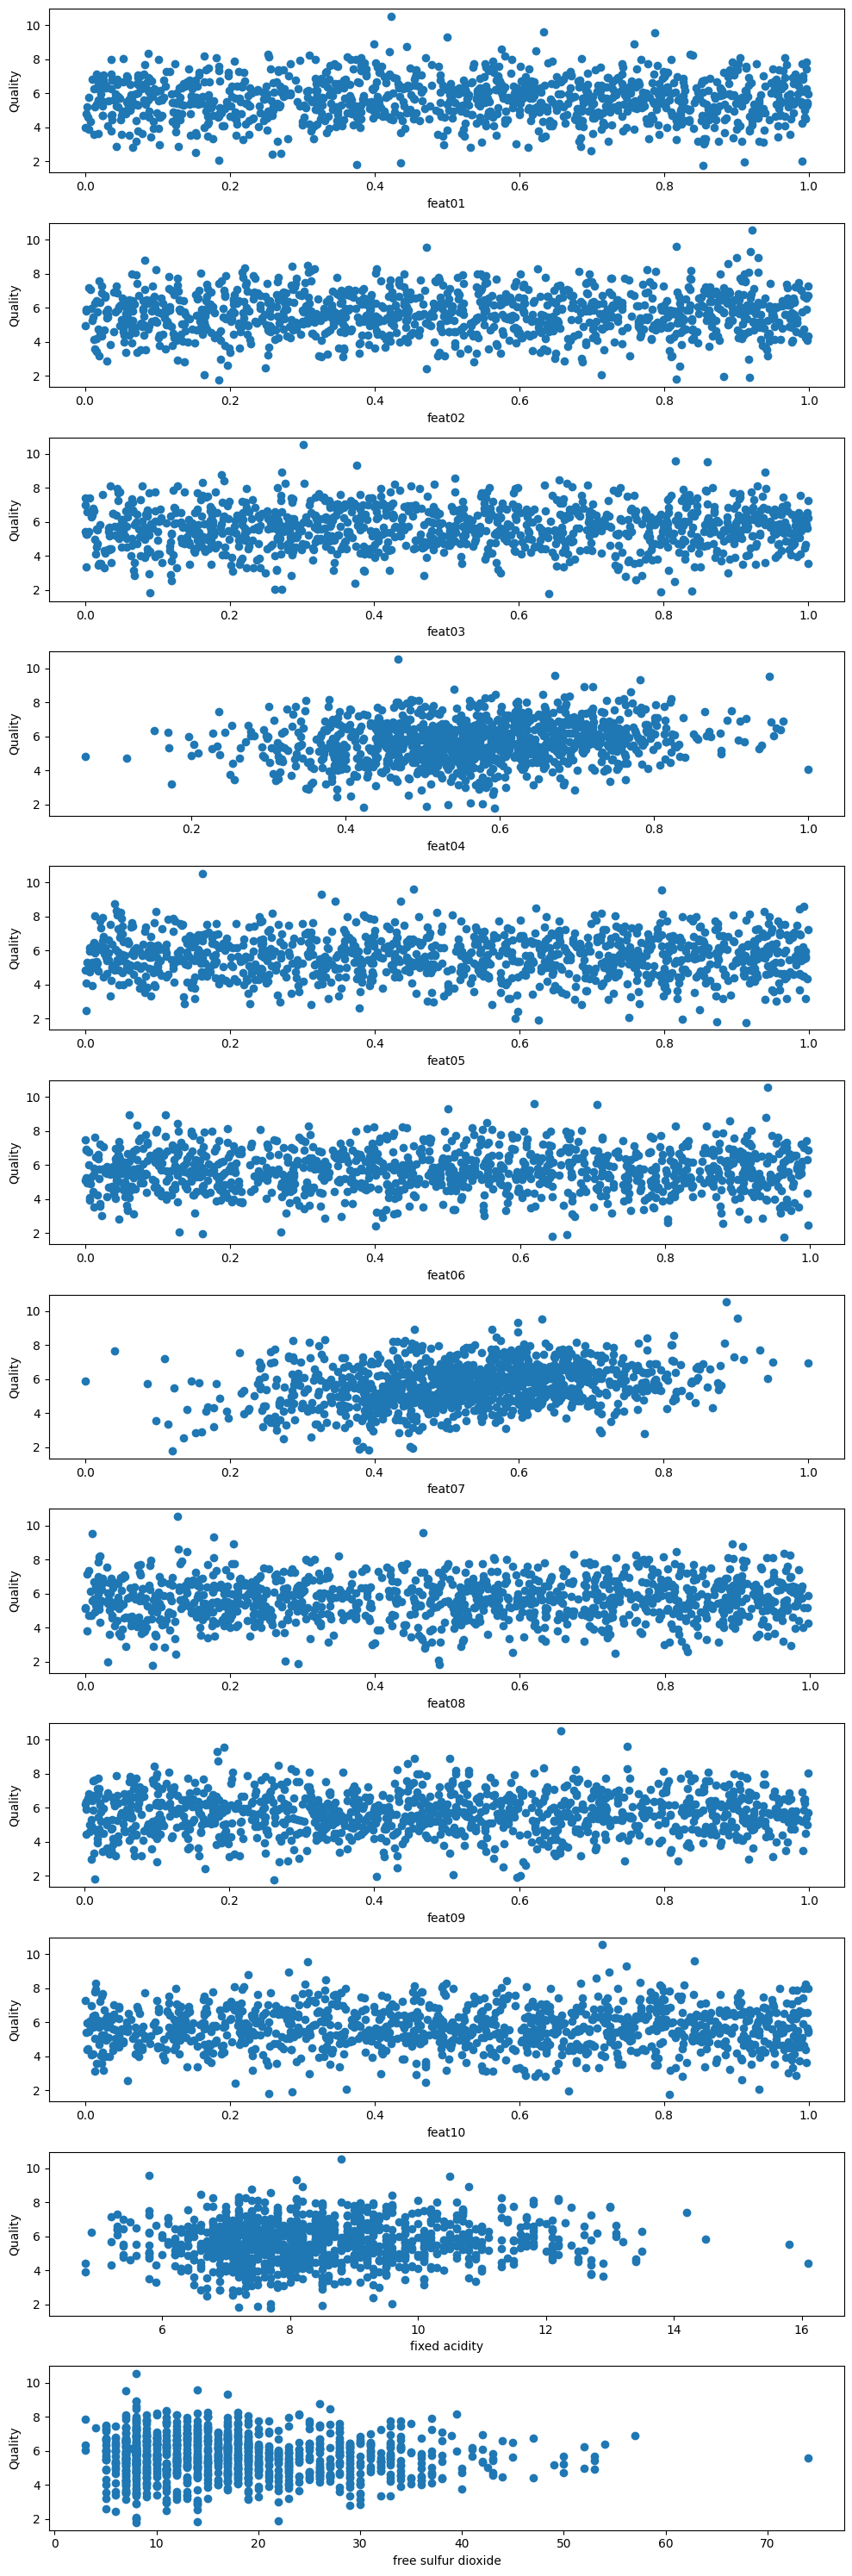

In [42]:
# Plotting features vs dependent variable
# Create a figure with 10 subplots
fig, axs = plt.subplots(12, 1, figsize=(10, 30))

# Iterate over the columns and create scatter plots
for i, column_name in enumerate(data.columns[5:17]):
    # Select the subplot
    ax = axs[i]
    
    # Create the scatter plot
    ax.scatter(data[column_name], data['quality'])
    
     # Set the x-axis label
    ax.set_xlabel(column_name)
    
    # Set the y-axis label
    ax.set_ylabel('Quality')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


To our sprise added features are not correlated with each other.

This lead us to think more about seemingly random features. They do not have to be correlated with each other at all. 

Let us run statistical tests to see if these variables are following certain distributions. The fact that the dependant variable *quality* is not correlated with the additional features apart from features 4 and 7 is backing our approach. 

## Statistical test
Kolgomorov-Smirnoff

H0: follows a uniform distribution on [0,1]

H1: does not follow a uniform distribution on [0,1]

In [43]:
from scipy.stats import kstest
column_names = data.columns[5:15]
answers = [] 
for column_name in column_names:
    # Perform the Kolmogorov-Smirnov test
    statistic, p_value = kstest(data[f"{column_name}"], 'uniform', args=(0, 1))

    # Check if the p-value is greater than a significance level
    if p_value > 0.05:
        answers.append((column_name, "H0", p_value))
    else:
        answers.append((column_name, "H1", p_value))
print(answers)


[('feat01', 'H0', 0.16800426780651245), ('feat02', 'H0', 0.48997099145542256), ('feat03', 'H0', 0.2713725840184462), ('feat04', 'H1', 2.0778077974754767e-84), ('feat05', 'H0', 0.5827294308943701), ('feat06', 'H0', 0.3612774938065255), ('feat07', 'H1', 4.167815787502649e-55), ('feat08', 'H0', 0.28253978497158116), ('feat09', 'H0', 0.11289340475363985), ('feat10', 'H0', 0.07687665641564845)]


Only two of the additional features are deemed non-random by the Kologomorov - Smirnoff test : 4, 7.

### Conclusion
Based on the statistical evidence above we decide to not use additional features other than 4,7.

# Exploration
Repeat correlation analysis without features 1-3,5,6,8-10

In [62]:
data = data.drop(columns=['feat01', 'feat02', "feat03","feat05","feat06","feat08","feat09","feat10"])

## Correlations

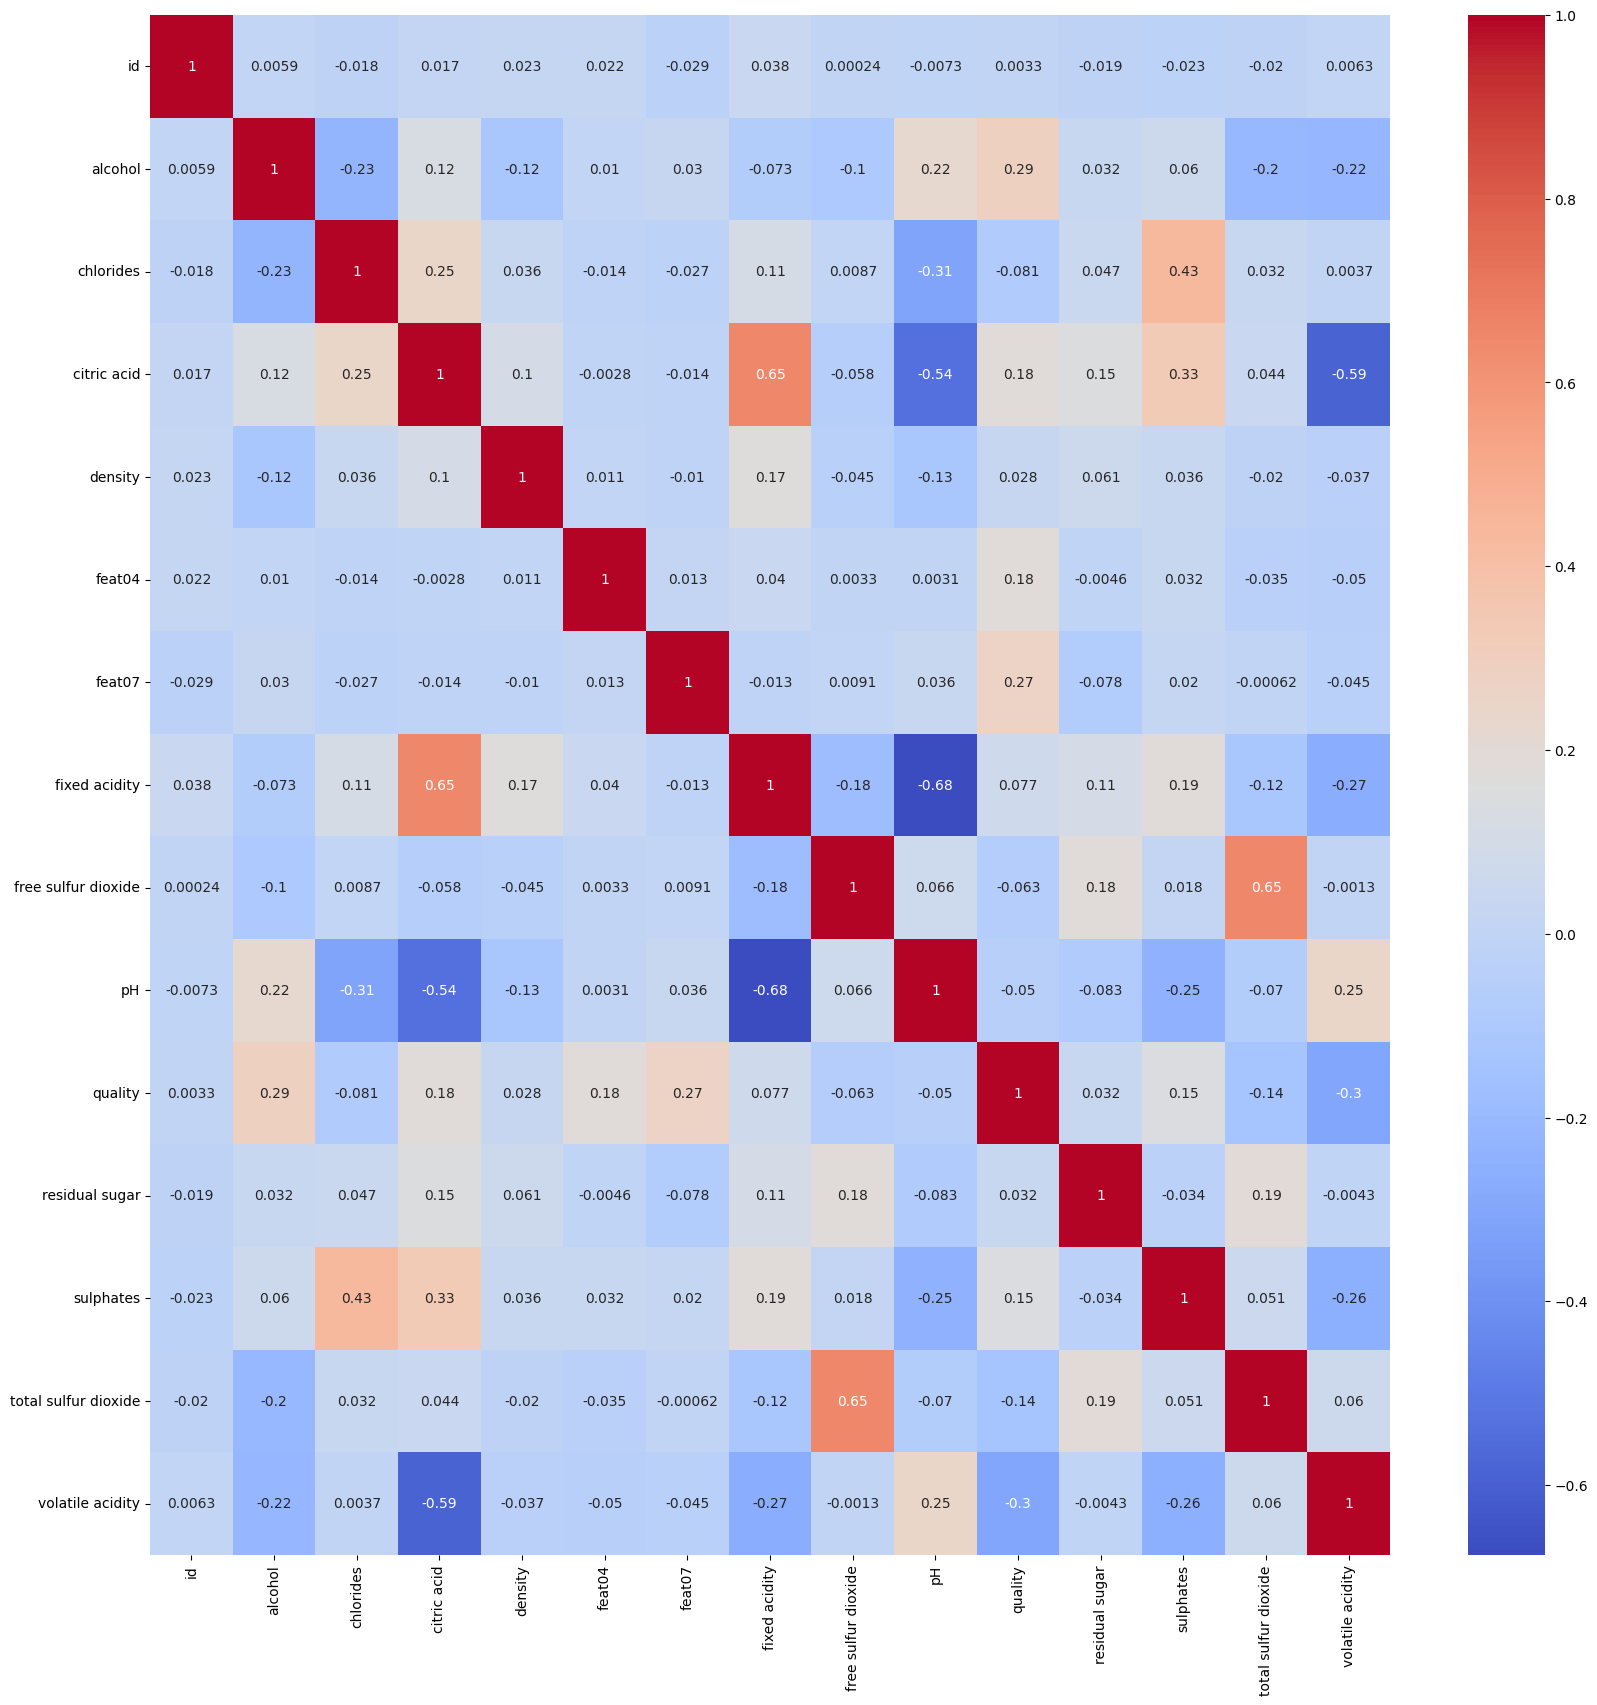

In [48]:
# Assuming df is your DataFrame
correlation_matrix = data.corr()

# Use seaborn to create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig("../plots/correlation_matrix.svg", format='svg')
plt.show()

We should acknowledge that there are some quite high correlations between variables.

1. *quality* is positivly correlated with alcohol, feat04, feat07, and sulphates 
2. *quality* is negativly correlated with total sulfur dioxide and colatile acidity
3. there are 3 high correlations between:
- volatile acidity and citric acid
- pH and citric acid
- total sulfur dioxide and free sulffur dioxide

However, there is no reason to remove any features further

# Histograms

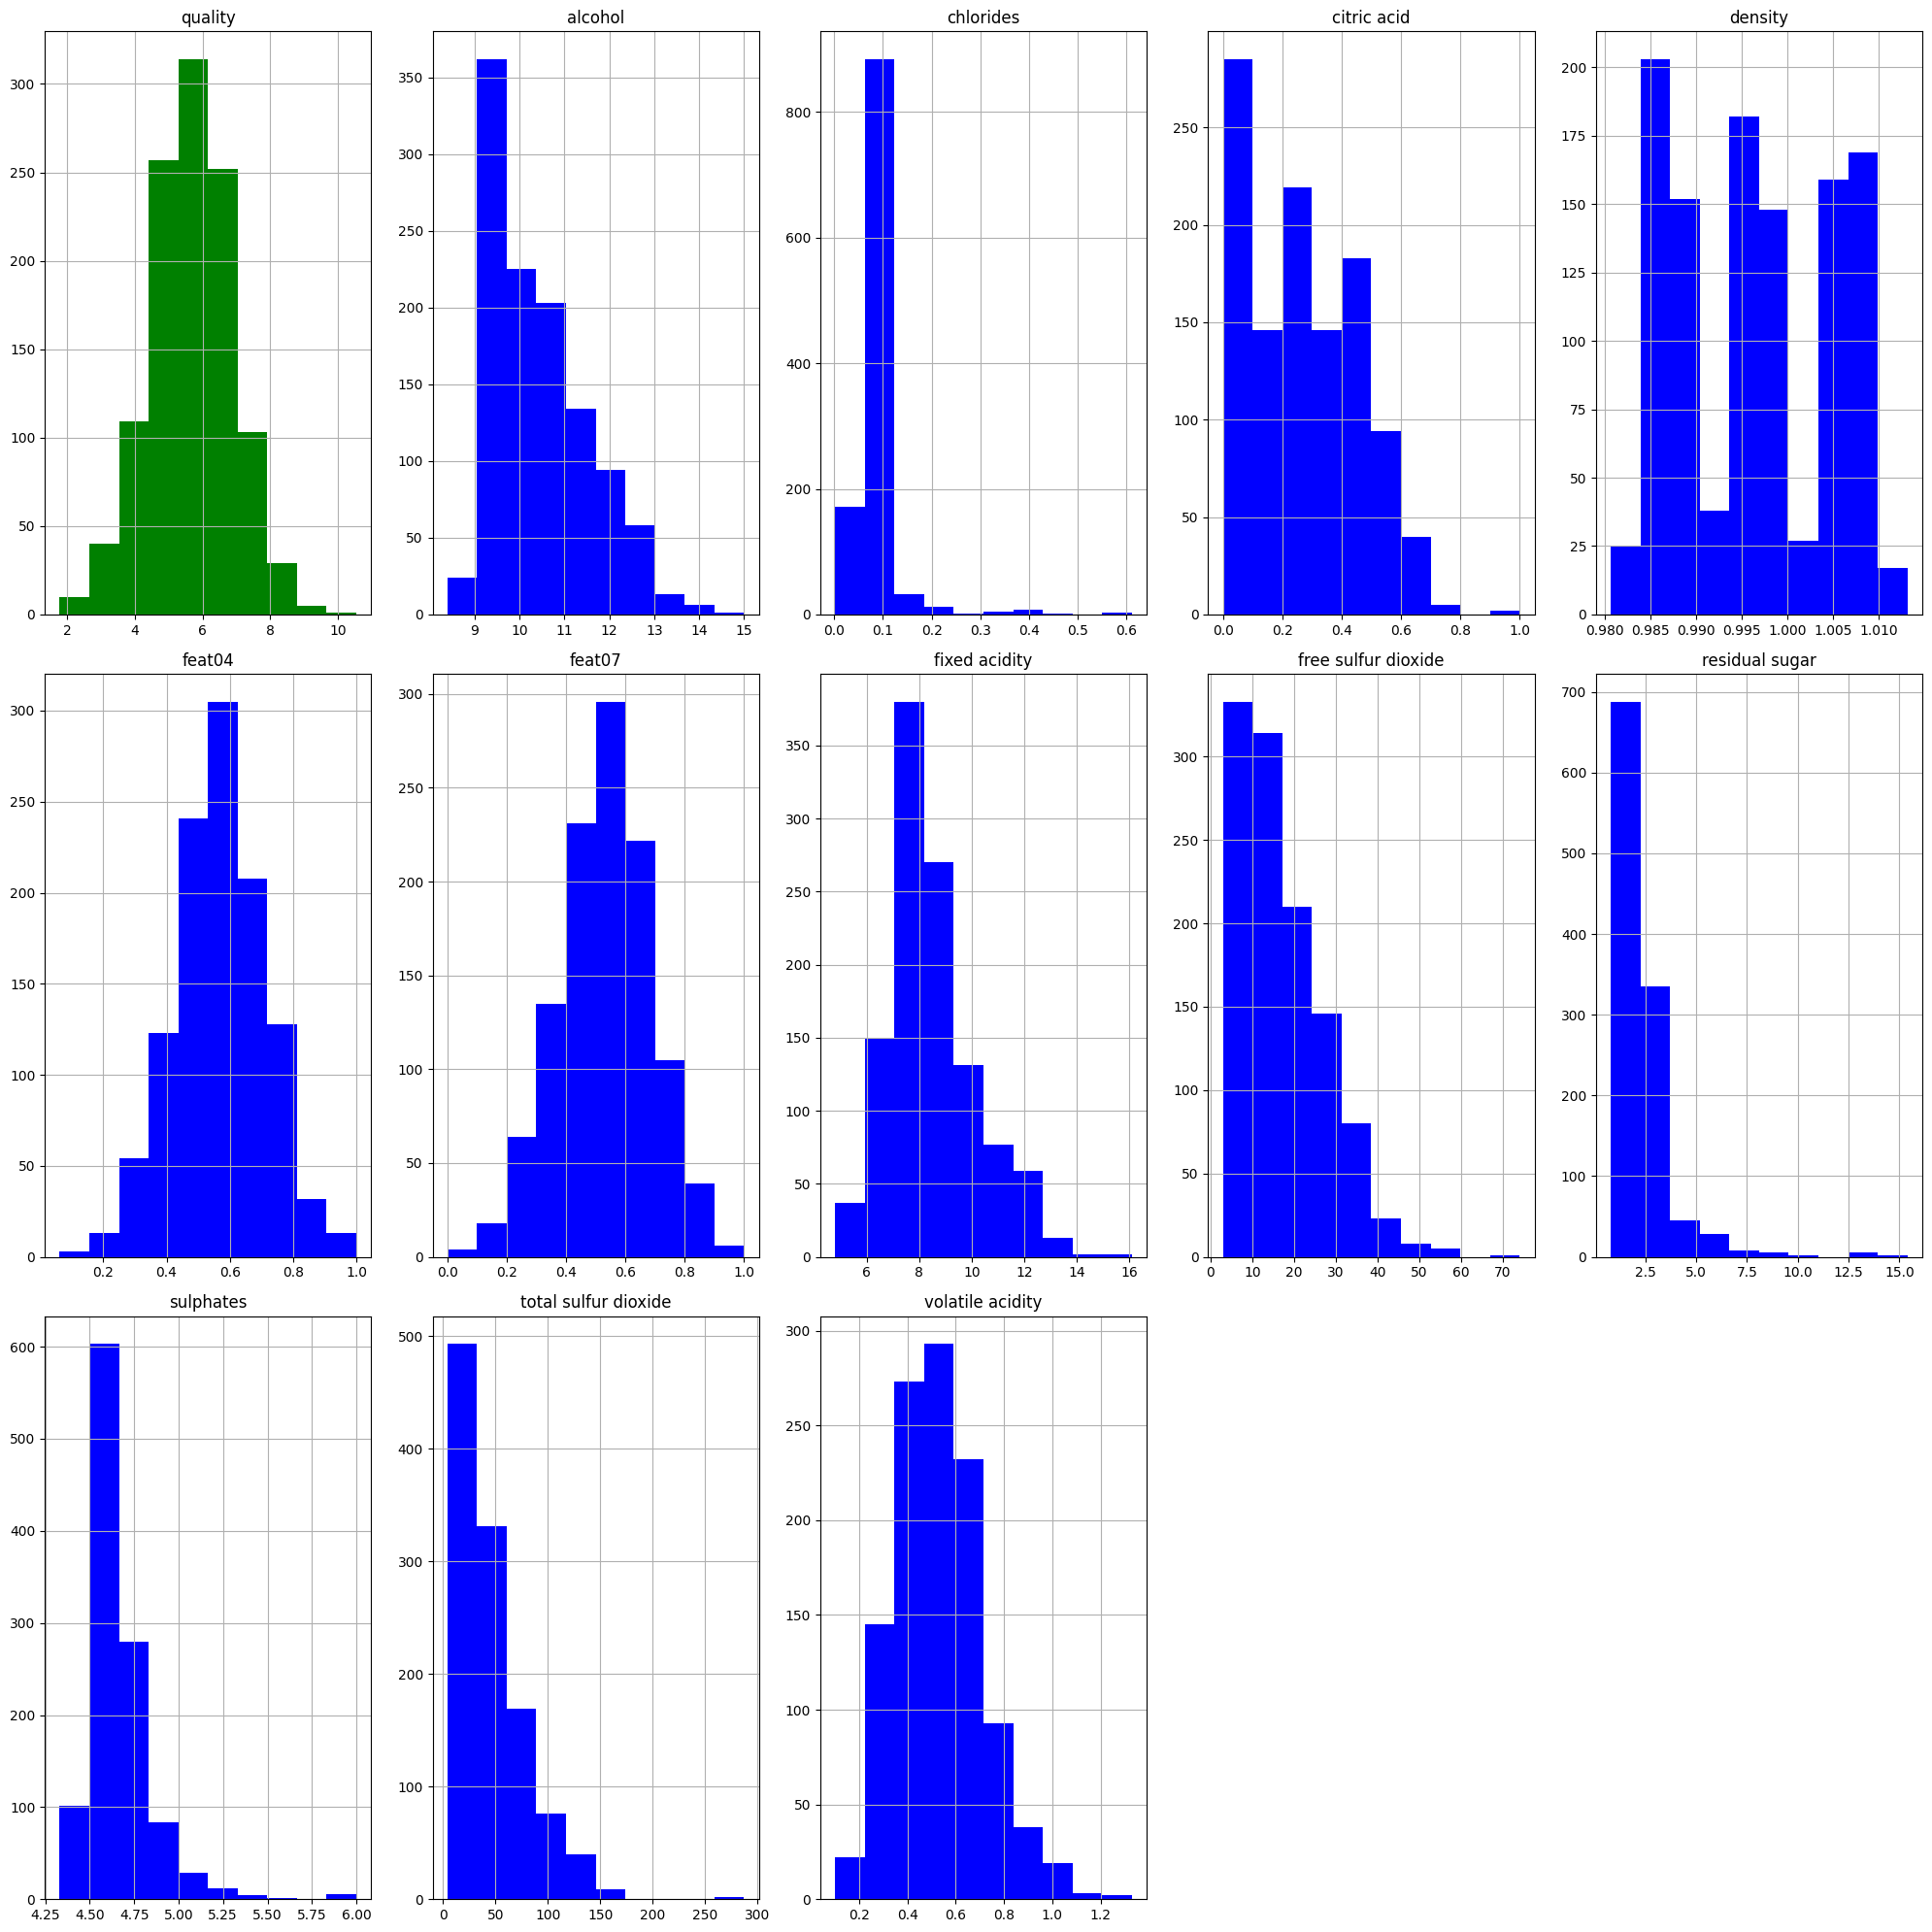

In [77]:
# for col in data.columns:
#     if col != "id":
#         data[col].hist(figsize=(10, 10))
#         plt.title(f"Histogram of {col}")
#         plt.show()

for i, col in enumerate(["quality"] + data.columns[1:9].to_list() +data.columns[11:].to_list(), start=1):
    if col != "id":
        plt.subplot(3, 5, i)
        data[col].hist(figsize=(20, 20), color="green" if col == "quality" else "blue")
        plt.title(f"{col}")
plt.tight_layout()
plt.show()

